<a href="https://colab.research.google.com/github/muditha11/Deep-Learning/blob/main/01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro

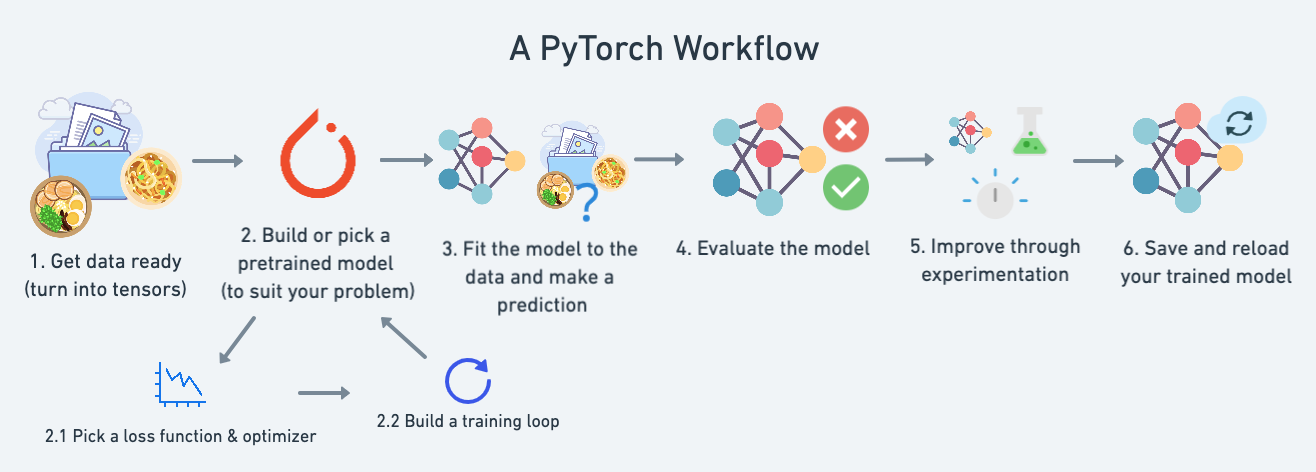

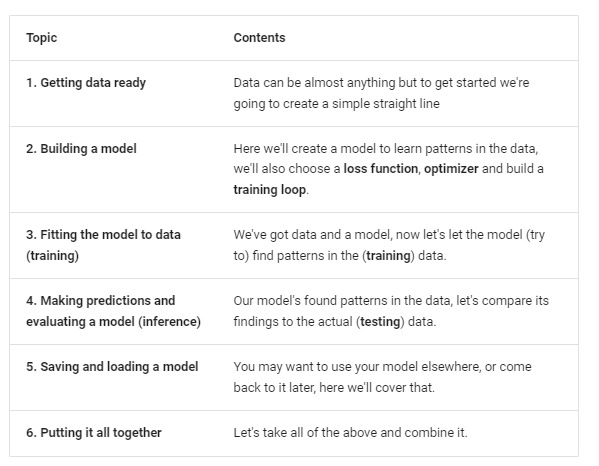

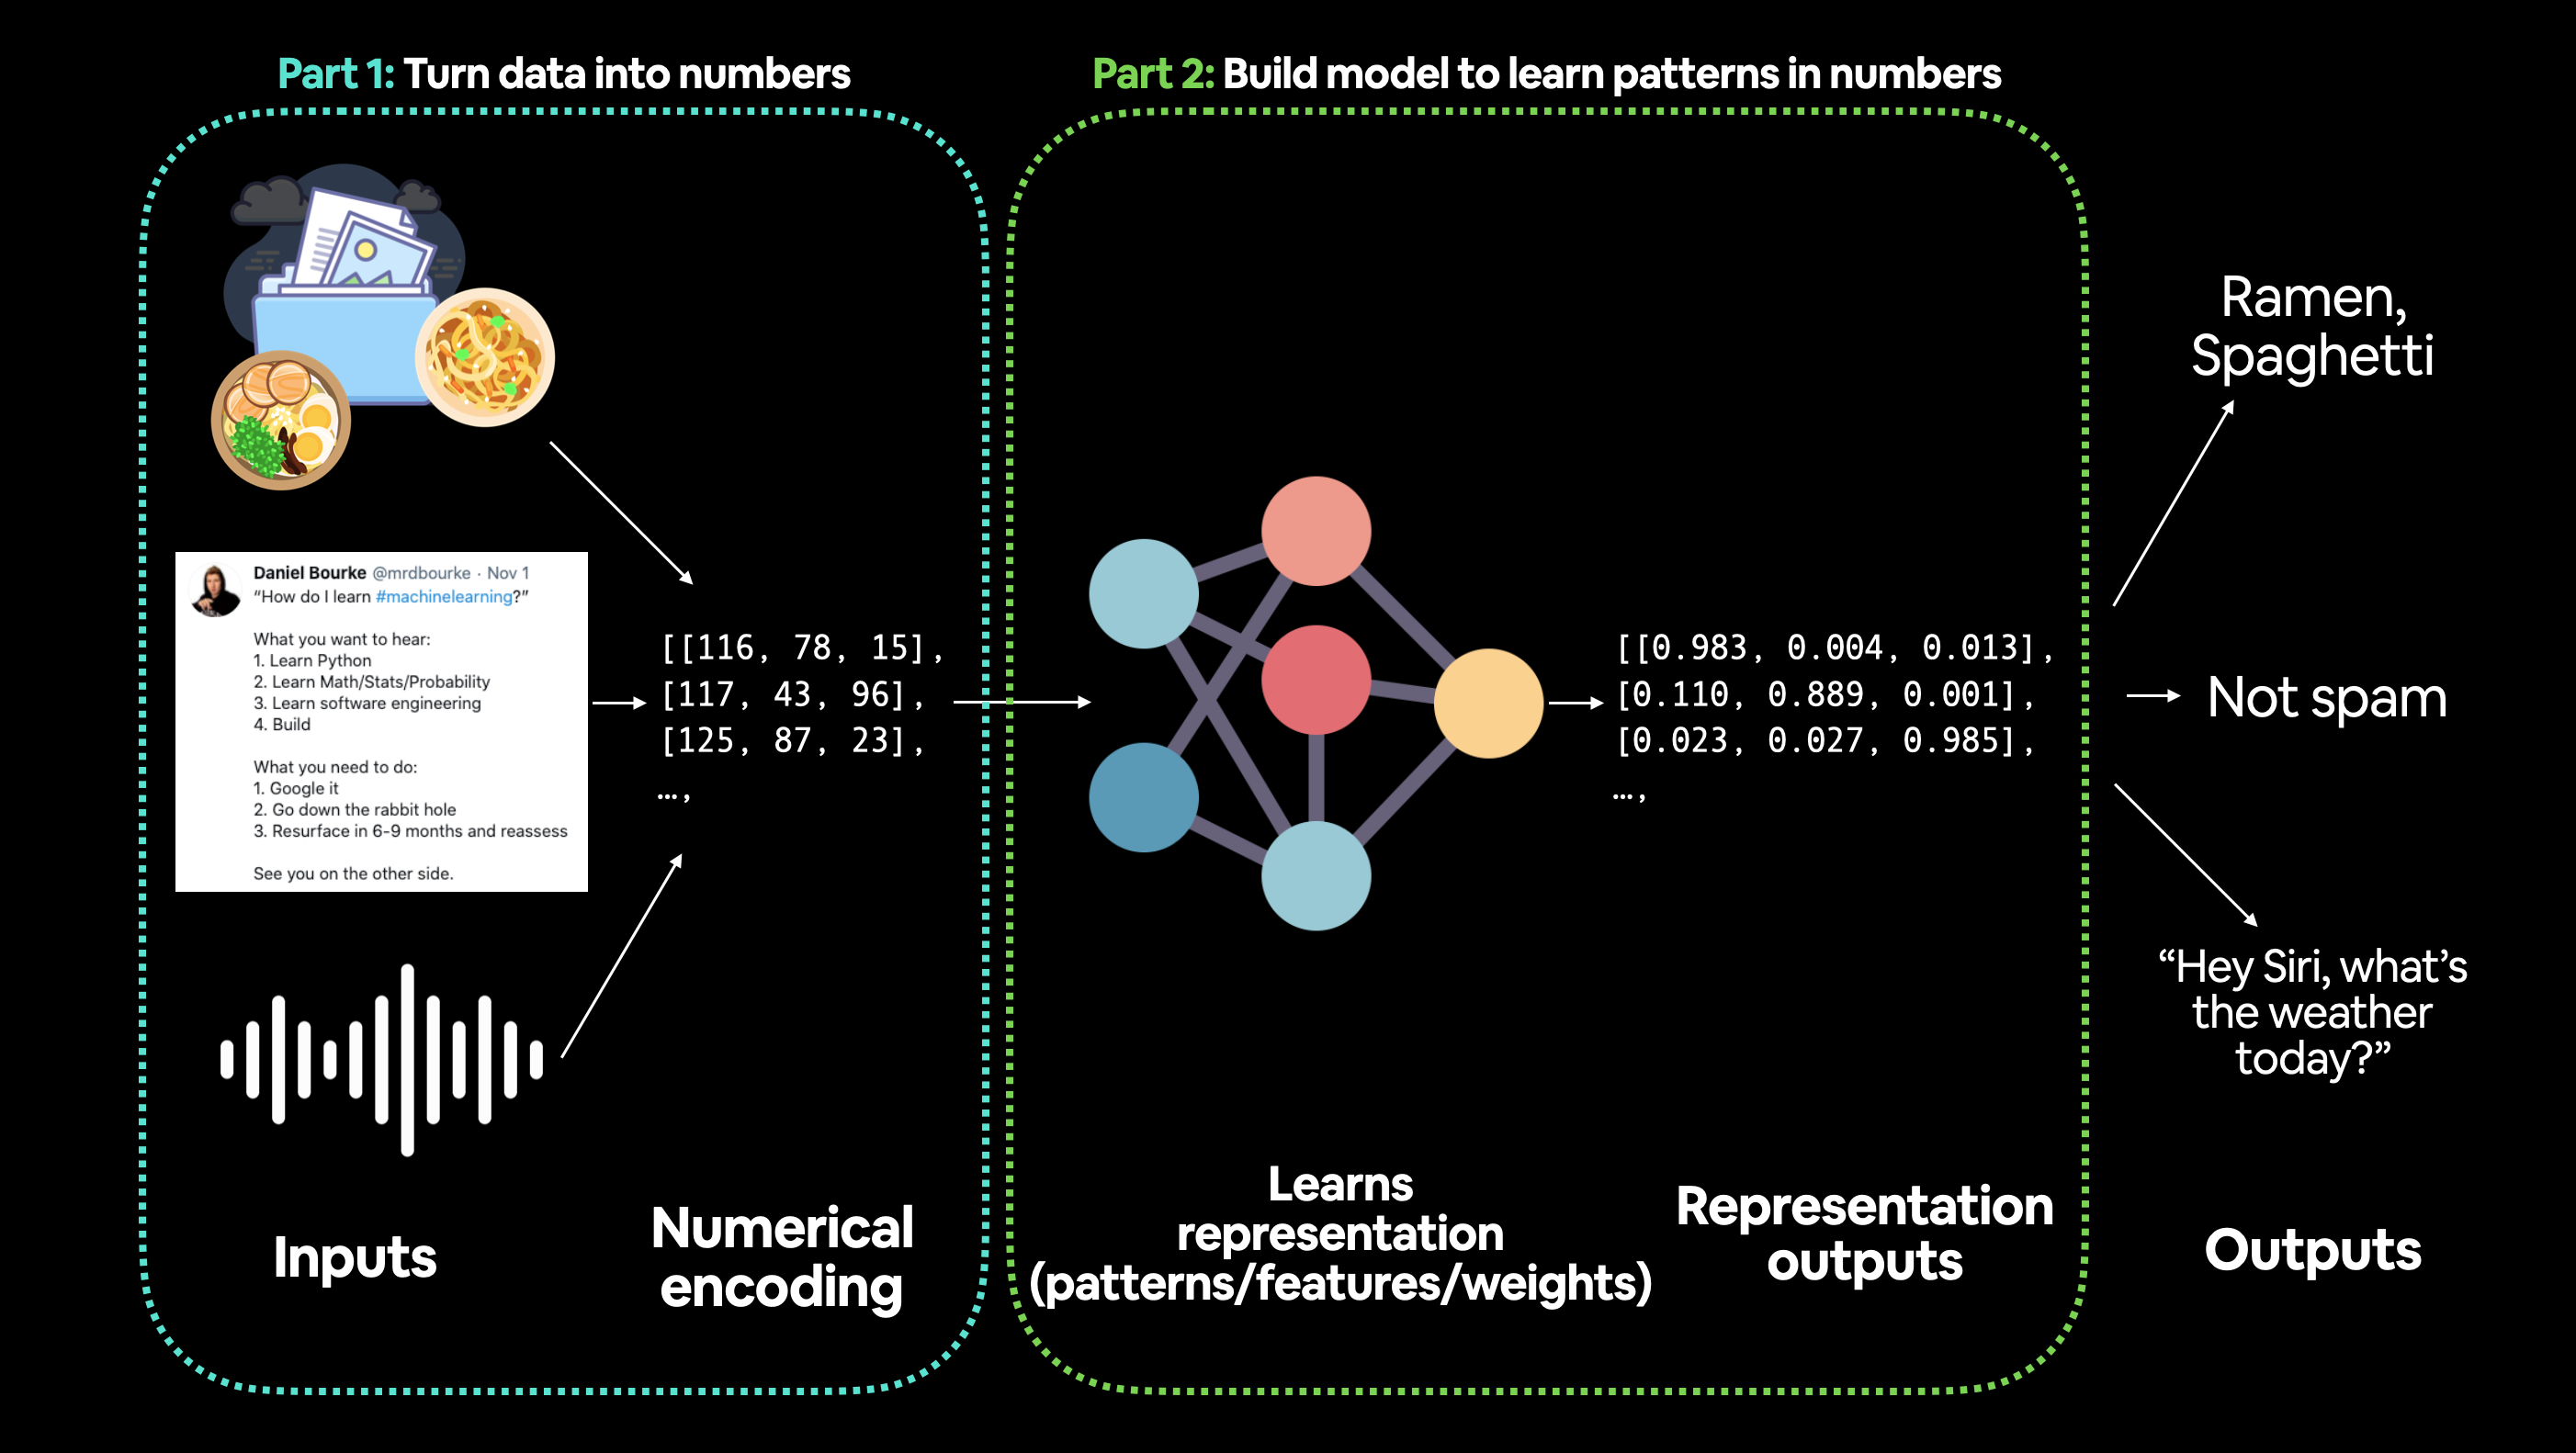

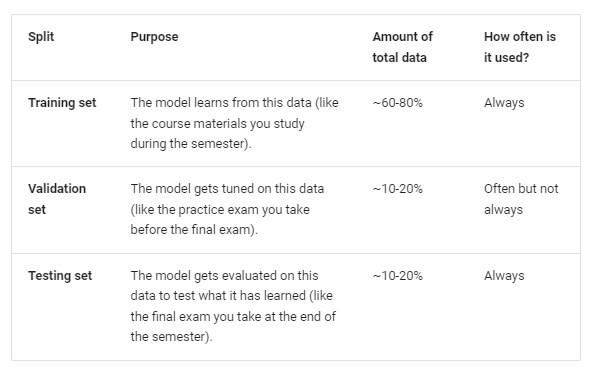

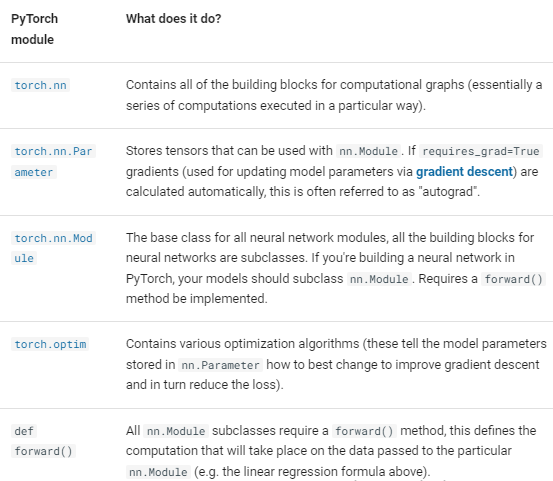

[Pytorch cheat sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

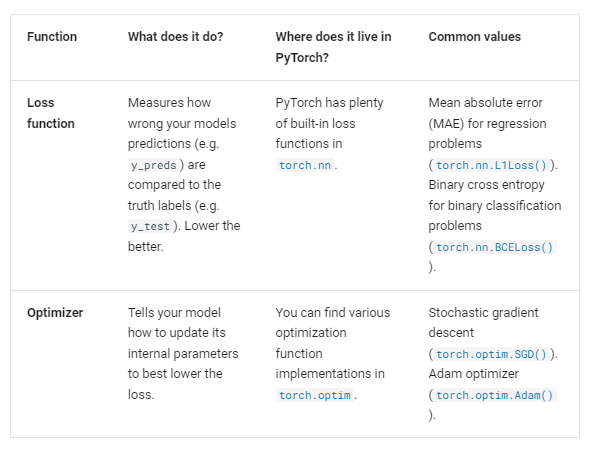

# M1

## Linear Regression

In [ ]:
import numpy as np
import torch

In [ ]:
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]],dtype="float32")

targets = np.array([[56,70],
                   [81,101],
                   [119,133],
                   [22,37],
                   [103,119]],dtype="float32")


In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#### Create random values for w,b
w = torch.rand((2,3),requires_grad=True)
b = torch.rand(2,requires_grad=True)
print(w)
print(b)

tensor([[0.1587, 0.7159, 0.2803],
        [0.5652, 0.1748, 0.3214]], requires_grad=True)
tensor([0.1325, 0.1803], requires_grad=True)


In [ ]:
def model(x):
  return x@w.t() +b

In [ ]:
pred = model(inputs)
pred

tensor([[ 71.7371,  66.9743],
        [ 95.5138,  87.5688],
        [126.1282,  91.4204],
        [ 57.4779,  77.2423],
        [ 99.4300,  78.4606]], grad_fn=<AddBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

We can see the predictions and actual values are different

---
This is because the weights are randomly set. Therefore we have to tune these weights




## Loss Function

In [ ]:
diff  = pred - targets
torch.sum(diff*diff)/diff.numel()

tensor(696.1844, grad_fn=<DivBackward0>)

This is the MSE <br>
This value tells us how bad our prediction is

In [ ]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff*diff)/diff.numel()

In [ ]:
loss = mse(pred,targets)

## Compute Gradients

In [ ]:
loss.backward()

In [ ]:
print(w)
print(w.grad)

tensor([[0.1587, 0.7159, 0.2803],
        [0.5652, 0.1748, 0.3214]], requires_grad=True)
tensor([[ 1292.4253,   893.9211,   616.3586],
        [ -750.6072, -1823.5385,  -950.0215]])


In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

In [ ]:
pred = model(inputs)
loss = mse(pred,targets)
print(loss)

tensor(626.0902, grad_fn=<DivBackward0>)


In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## Training the Model

Steps


1.   Generate predictions
2.   Calculate Loss
3.   Compute gradients w.r.t. weights and biases
4.   Adjust the weights by a small proportion of gradient
5.   Reset the gradients to zero





In [ ]:
### 1
pred = model(inputs)
pred

tensor([[ 69.9295,  69.1527],
        [ 93.1564,  90.4647],
        [123.4483,  95.0681],
        [ 55.5470,  79.1437],
        [ 97.2485,  81.3942]], grad_fn=<AddBackward0>)

In [ ]:
### 2
loss = mse(pred,targets)
loss

tensor(626.0902, grad_fn=<DivBackward0>)

In [ ]:
### 3
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 1107.0062,   697.8983,   494.7228],
        [ -523.3558, -1572.9446,  -796.7657]])
tensor([11.6659, -8.9553])


In [ ]:
### 4 
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
### new weights and biases
print(w,b)

tensor([[0.1348, 0.7000, 0.2691],
        [0.5780, 0.2088, 0.3389]], requires_grad=True) tensor([0.1322, 0.1805], requires_grad=True)


In [ ]:
### new loss
pred = model(inputs)
loss = mse(pred,targets)
print(loss)

tensor(576.9483, grad_fn=<DivBackward0>)


We want to do this continously

In [ ]:
### For 100 epochs

for i in range(100):
  pred = model(inputs)
  loss = mse(pred,targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
pred = model(inputs)
loss = mse(pred,targets)
loss

tensor(148.6919, grad_fn=<DivBackward0>)

In [ ]:
print(pred)
print(targets)

tensor([[ 59.7370,  75.2600],
        [ 81.1597, 101.0607],
        [116.9406, 124.1114],
        [ 35.6221,  65.3194],
        [ 91.6389, 103.3353]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Now predictions are much closer to target values

#M2

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

## Creating Dataset

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Train-Test split

In [ ]:
train_split = int(.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

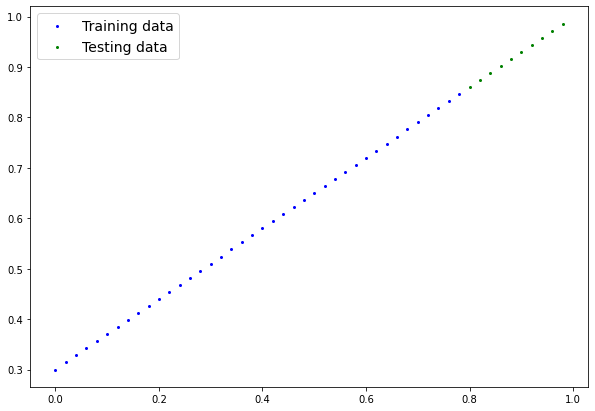

In [ ]:
plot_predictions();

## Build Model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = float))

  def forward(self, x: torch.Tensor) -> torch.Tensor :  ## dtype of x is tensor and return type is also tensor
    return self.weights*x + self.bias



In [ ]:
#Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

  ## Making Predictions

In [ ]:
with torch.inference_mode():    #inference mode disables tracking grad-->makes predictions faster
  y_preds = model_0(X_test)     #Running test data through forward method
 
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

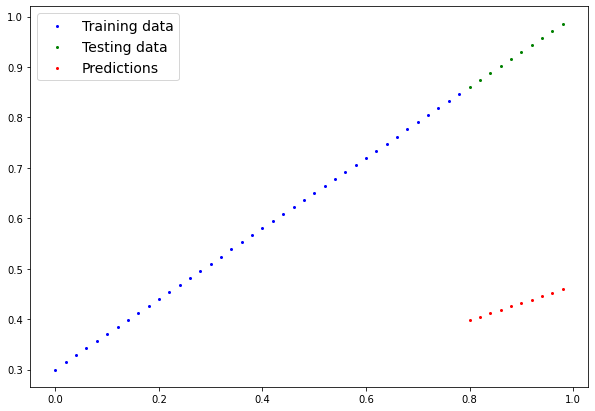

In [ ]:
plot_predictions(predictions=y_preds)

## Training the Model

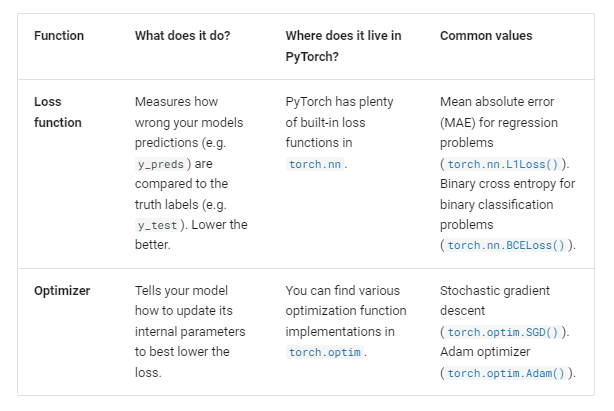

Paramters = set by model by back propagation<br>

Hyperparameters = Set by user

In [ ]:
### Loss Function
loss_fn = nn.L1Loss()

### Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)


### Building a Training Loop

In [ ]:
epochs = 300

#Tracking values
epoch_count = []
loss_values = []
test_loss_values = []
 
for epoch in range(epochs):
  #Put model into training mode(This is the default state of a model)
  model_0.train()

  #1-Forward Pass --> This will perform forrward() method in model object
  y_pred = model_0(X_train)

  #2-Calculating Loss -->How wrong the predictions are
  loss = loss_fn(y_pred,y_train)
  #print(f"Loss={loss}")

  #3-Optimizer zero grad --> Gradients accumulate every loop. Therefore we want to reset it back to zero before a fresh calculation
  optimizer.zero_grad()

  #4-Perform Backprop --> Compute gradient of every parameter with requires_grad=True
  loss.backward()

  #5-Step Optimizer (perform gradient descent) --> Update parameters w.r.t. gradient calculated in step 4
  optimizer.step()

  #testing
  model_0.eval()   #turns off different settings in model not needed for evaluation/testing
  with torch.inference_mode():
    #1-Do the forward pass
    test_pred = model_0(X_test)

    #2-Calculate Loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")
    print(model_0.state_dict())

Epoch:0 | Loss:0.3128813517678373 | Test Loss:0.4810651795382455
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388], dtype=torch.float64))])
Epoch:10 | Loss:0.19767138632506426 | Test Loss:0.346355255078788
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388], dtype=torch.float64))])
Epoch:20 | Loss:0.08908726094682914 | Test Loss:0.21729659528684148
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333], dtype=torch.float64))])
Epoch:30 | Loss:0.05314853437903411 | Test Loss:0.14464020247411263
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768], dtype=torch.float64))])
Epoch:40 | Loss:0.045437965798191725 | Test Loss:0.11360953504991064
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868], dtype=torch.float64))])
Epoch:50 | Loss:0.04167863324115598 | Test Loss:0.09919951553296583
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843], dtype=torch.float64))])
Epoch:60 | Loss:0.03818932177440

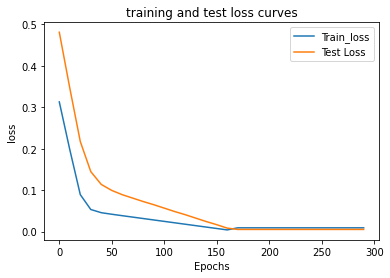

In [ ]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train_loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

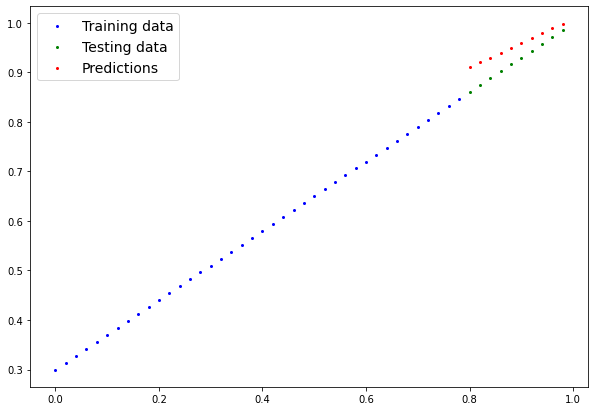

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(y_test)

plot_predictions(predictions=y_preds_new )

## Saving and Load Model

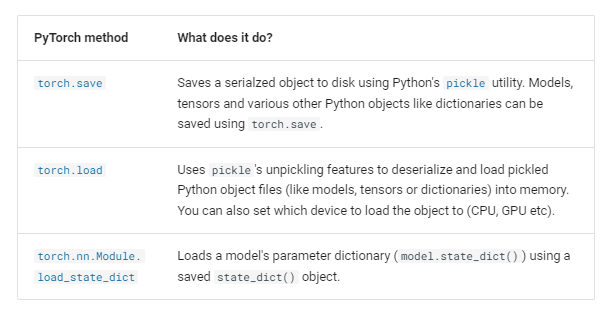

In [ ]:
#Save
from pathlib import Path
path = Path("models")
path.mkdir(parents=True,exist_ok=True)
model_name = "01_pytorch_workflow_model_0.pth"
save_path = path / model_name

torch.save(model_0.state_dict(),save_path)

In [ ]:
#Load
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(save_path))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [ ]:
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

# Linear Model

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device used is:{device}")

Device used is:cuda


## Data

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight+X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800]]))

In [ ]:
#split
train_split = int(len(X)*.8)
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

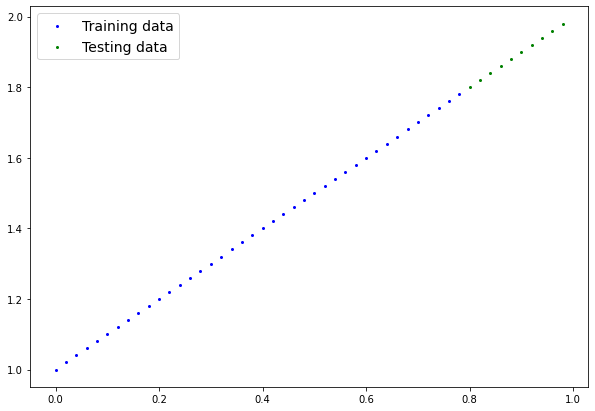

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test)

## Model

In [ ]:
class LinearRegressionv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model = LinearRegressionv2()
model,model.state_dict()

(LinearRegressionv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

## Loss and Optimizer

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)


In [ ]:
torch.manual_seed(42)

In [ ]:
epochs = 200
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  #TRAINING
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #TESTING
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if(epoch%10==0):
      print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")




Epoch:0 | Loss:0.26182207465171814 | Test Loss:0.3660818040370941
Epoch:10 | Loss:0.14661218225955963 | Test Loss:0.23137198388576508
Epoch:20 | Loss:0.04206162318587303 | Test Loss:0.10607139021158218
Epoch:30 | Loss:0.025920331478118896 | Test Loss:0.06305763870477676
Epoch:40 | Loss:0.022341707721352577 | Test Loss:0.05135933309793472
Epoch:50 | Loss:0.018903424963355064 | Test Loss:0.043773818761110306
Epoch:60 | Loss:0.015474972315132618 | Test Loss:0.03550131246447563
Epoch:70 | Loss:0.012038079090416431 | Test Loss:0.02722884528338909
Epoch:80 | Loss:0.00860145129263401 | Test Loss:0.019643355160951614
Epoch:90 | Loss:0.005173021461814642 | Test Loss:0.011370874010026455
Epoch:100 | Loss:0.0021416067611426115 | Test Loss:0.008431876078248024
Epoch:110 | Loss:0.00754981953650713 | Test Loss:0.008431816473603249
Epoch:120 | Loss:0.00754981953650713 | Test Loss:0.008431816473603249
Epoch:130 | Loss:0.00754981953650713 | Test Loss:0.008431816473603249
Epoch:140 | Loss:0.007549819536

In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9950]], device='cuda:0')),
             ('linear_layer.bias', tensor([1.0095], device='cuda:0'))])

In [ ]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)


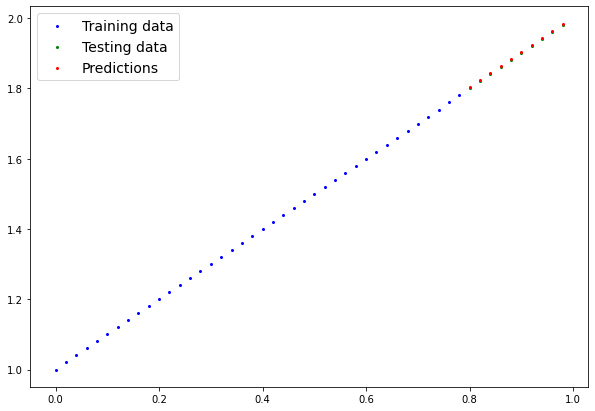

In [ ]:
plot_predictions(predictions=y_preds.cpu())

## Saving and loading

In [ ]:
#Save
from pathlib import Path
path = Path("models")
path.mkdir(parents=True,exist_ok=True)
model_name = "01_pytorch_workflow_model_linear.pth"
save_path = path / model_name

torch.save(model.state_dict(),save_path)

In [ ]:
#Load
loaded_model = LinearRegressionv2()

loaded_model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9950]])),
             ('linear_layer.bias', tensor([1.0095]))])

In [ ]:
loaded_model.to(device)

LinearRegressionv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [ ]:
loaded_model_preds

tensor([[1.8055],
        [1.8254],
        [1.8453],
        [1.8652],
        [1.8851],
        [1.9050],
        [1.9249],
        [1.9448],
        [1.9647],
        [1.9846]], device='cuda:0')